In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib

In [3]:
time_line_cnn = pd.read_csv('/Users/sandrobarreshamers/github/krweb/Query_files/time_line_cnn.csv')
print(time_line_cnn)

                          event             datetime  \
0    http://example.com/E_CNN_1  2021-01-06T07:30:00   
1    http://example.com/E_CNN_2  2021-01-06T09:24:00   
2    http://example.com/E_CNN_3  2021-01-06T09:52:00   
3    http://example.com/E_CNN_4  2021-01-06T10:00:00   
4    http://example.com/E_CNN_5  2021-01-06T10:15:00   
5    http://example.com/E_CNN_6  2021-01-06T10:47:00   
6    http://example.com/E_CNN_7  2021-01-06T11:20:00   
7    http://example.com/E_CNN_8  2021-01-06T12:00:00   
8    http://example.com/E_CNN_9  2021-01-06T12:00:00   
9   http://example.com/E_CNN_10  2021-01-06T13:00:00   
10  http://example.com/E_CNN_11  2021-01-06T13:10:00   
11  http://example.com/E_CNN_12  2021-01-06T13:19:00   
12  http://example.com/E_CNN_13  2021-01-06T13:25:00   
13  http://example.com/E_CNN_14  2021-01-06T13:39:00   
14  http://example.com/E_CNN_15  2021-01-06T14:00:00   
15  http://example.com/E_CNN_16  2021-01-06T14:03:00   
16  http://example.com/E_CNN_17  2021-01-06T14:1

In [4]:
# extract the events from the 'event' column and store them in a list
events_cnn = time_line_cnn['event'].str.split('/').str[-1].str.upper().str.replace('_', ' ').tolist()


time_dict = {}
for t in events_cnn:
    time_dict[t] = True

unique_event_cnn = [t for t in time_dict.keys()]

# print the events list
print(unique_event_cnn)

['E CNN 1', 'E CNN 2', 'E CNN 3', 'E CNN 4', 'E CNN 5', 'E CNN 6', 'E CNN 7', 'E CNN 8', 'E CNN 9', 'E CNN 10', 'E CNN 11', 'E CNN 12', 'E CNN 13', 'E CNN 14', 'E CNN 15', 'E CNN 16', 'E CNN 17', 'E CNN 18', 'E CNN 19', 'E CNN 20', 'E CNN 21', 'E CNN 22', 'E CNN 23', 'E CNN 24', 'E CNN 25', 'E CNN 26', 'E CNN 27', 'E CNN 28', 'E CNN 29', 'E CNN 30', 'E CNN 31', 'E CNN 32', 'E CNN 33', 'E CNN 34', 'E CNN 36', 'E CNN 37', 'E CNN 38', 'E CNN 39', 'E CNN 40', 'E CNN 41', 'E CNN 42', 'E CNN 43', 'E CNN 44', 'E CNN 45', 'E CNN 46', 'E CNN 47', 'E CNN 48', 'E CNN 49', 'E CNN 50', 'E CNN 51', 'E CNN 52', 'E CNN 53', 'E CNN 54', 'E CNN 55', 'E CNN 56', 'E CNN 57', 'E CNN 58']


In [13]:
import datetime

# assuming your original dataset is stored in a pandas dataframe called df
# convert datetime column to datetime type
time_line_cnn['datetime'] = pd.to_datetime(time_line_cnn['datetime'])

# create empty lists for storing the dates and labels
dates_cnn = []
labels_cnn = []
times_cnn = []


for index, row in time_line_cnn.iterrows():
    # append the date to the dates list
    dates_cnn.append(row['datetime'].date())
    # append the label to the labels list
    labels_cnn.append(row['event'])
    # print the time of the datetime
    times_cnn.append(row['datetime'].strftime('%H:%M:%S'))
    #print(row['datetime'].strftime('%H:%M:%S'))
labels_cnn = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels_fox, dates_fox)]

time_dict_cnn = {}
for t in times_cnn:
    time_dict_cnn[t] = True

unique_time_cnn = [t for t in time_dict_cnn.keys()]

print(unique_time_cnn)

['07:30:00', '09:24:00', '09:52:00', '10:00:00', '10:15:00', '10:47:00', '11:20:00', '12:00:00', '13:00:00', '13:10:00', '13:19:00', '13:25:00', '13:39:00', '14:00:00', '14:03:00', '14:13:00', '14:14:00', '14:15:00', '14:24:00', '14:26:00', '14:28:00', '14:30:00', '14:32:00', '14:35:00', '14:38:00', '14:39:00', '14:40:00', '14:44:00', '14:45:00', '14:53:00', '15:00:00', '15:09:00', '15:13:00', '15:15:00', '15:31:00', '16:03:00', '16:05:00', '16:15:00', '16:17:00', '16:45:00', '18:00:00', '18:01:00', '18:27:00', '19:02:00', '19:14:00', '20:00:00', '20:39:00', '21:02:00', '21:23:00', '22:11:00', '22:19:00', '23:08:00', '23:10:00']


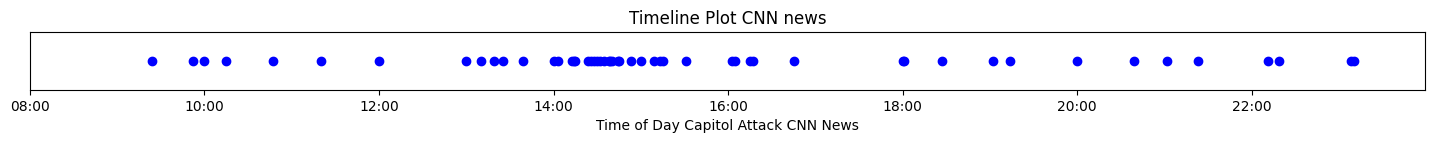

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns


unique_events = set(unique_event_cnn)

colors_test = sns.color_palette('bright', len(unique_events))

colors = {}
for i, event in enumerate(unique_events):
    colors[event] = colors_test[i]

        
datetimes = [datetime.strptime(time, '%H:%M:%S') for time in unique_time_cnn]


fig, ax = plt.subplots(figsize=(18,0.75))


colors_list = [colors[event] for event in unique_event_cnn]
ax.scatter(datetimes, [0.5] * len(datetimes), color='blue')



ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(datetime.strptime('08:00:00', '%H:%M:%S'), datetime.strptime('23:59:00', '%H:%M:%S'))
ax.set_xlabel('Time of Day Capitol Attack CNN News')


ax.set_yticks([])
ax.set_yticklabels([])

ax.set_title('Timeline Plot CNN news')


plt.show()




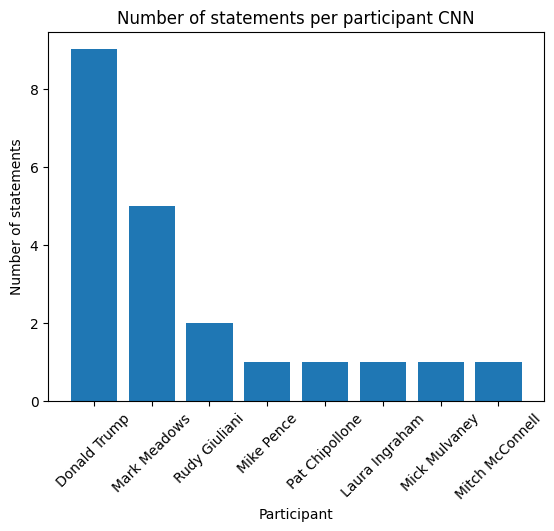

In [21]:
# Data
names = ['Donald Trump', 'Mark Meadows', 'Rudy Giuliani', 'Mike Pence', 'Pat Chipollone', 'Laura Ingraham', 'Mick Mulvaney', 'Mitch McConnell']
values = [9, 5, 2, 1, 1, 1, 1, 1]

# Plot
fig, ax = plt.subplots()
ax.bar(names, values)

# Set labels
ax.set_ylabel('Number of statements')
ax.set_xlabel('Participant')
ax.set_title('Number of statements per participant CNN')

# Rotate x-labels
plt.xticks(rotation=45)

# Show plot
plt.show()


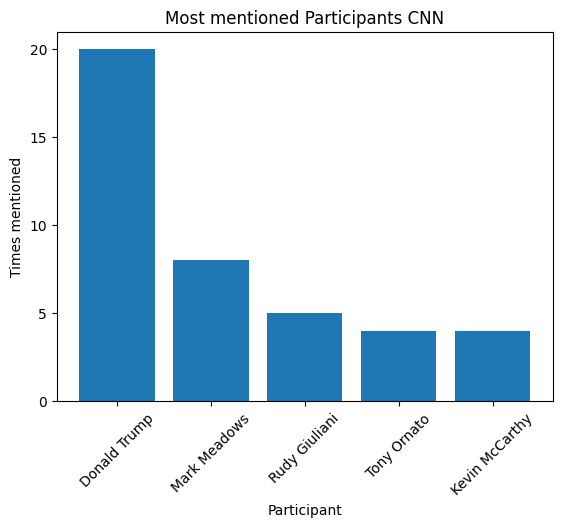

In [30]:
import matplotlib.pyplot as plt
# Data
names = ['Donald Trump', 'Mark Meadows', 'Rudy Giuliani', 'Tony Ornato', 'Kevin McCarthy']
values = [20, 8, 5, 4, 4]

# Sort the data by values in descending order
data = sorted(zip(values, names), reverse=True)[:5]
names = [name for value, name in data]
values = [value for value, name in data]

# Plot
fig, ax = plt.subplots()
ax.bar(names, values)

# Set labels
ax.set_ylabel('Times mentioned')
ax.set_xlabel('Participant')
ax.set_title('Most mentioned Participants CNN')

# Rotate x-labels

plt.xticks(rotation=45)
yticks = [0, 5, 10, 15, 20]
ax.set_yticks(yticks)


# Show plot
plt.show()
